In [58]:
import pandas as pd
import numpy as np
df = pd.read_csv('model_data.csv').drop(columns = ['Unnamed: 0'])

# KNN 1, n = 5 -> n = 23 by elbow method

In [59]:
df.head()

,prev_CW/SA_rate,S_create2SA_Create,S_Create2Start_Time,SA_Create2Start_Time,U_create2now,U_approve2now,type_d,segmentName_d,net_pay,target
0,0.0,0.024444,217.047500,217.023056,31.27281,24.076044,2,0,11.0,0
1,0.0,0.034444,19.714444,19.680000,31.27281,24.076044,2,0,45.0,0
2,0.0,0.011111,0.019167,0.008056,31.27281,24.076044,2,0,45.0,0
3,0.0,0.031667,183.788611,183.756944,31.27281,24.076044,2,1,40.0,0
4,0.0,6.073056,18.681111,12.608056,31.27281,24.076044,2,0,45.0,0


In [60]:
df.isna().sum()

prev_CW/SA_rate          0
S_create2SA_Create       0
S_Create2Start_Time      0
SA_Create2Start_Time     0
U_create2now             0
U_approve2now           36
type_d                   0
segmentName_d            0
net_pay                  0
target                   0
dtype: int64

In [61]:
df.dropna(inplace = True) # If True, do operation inplace and return None.

In [62]:
# make a dataset that num of tar = num of non tar
import random
df_tar = df[df['target']==1]
df_nontar = df[df['target']==0]

number_of_tar = df_tar.shape[0]
random_indices = random.sample(range(len(df_nontar)), int(number_of_tar))
df_nontar = df_nontar[df_nontar.index.isin(random_indices)]

In [63]:
df = pd.concat([df_tar, df_nontar])

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('target',axis=1))
scaled_features = scaler.transform(df.drop('target',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['target'],
                                                    test_size=0.30)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model instance with n_neighbors = 
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit this KNN model to the training data.
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [67]:
# Use the predict method to predict values KNN model and X_test.
pred = knn.predict(X_test)

# Create a confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[746 585]
 [459 796]]


              precision    recall  f1-score   support

           0       0.62      0.56      0.59      1331
           1       0.58      0.63      0.60      1255

    accuracy                           0.60      2586
   macro avg       0.60      0.60      0.60      2586
weighted avg       0.60      0.60      0.60      2586



Text(0, 0.5, 'Error Rate')

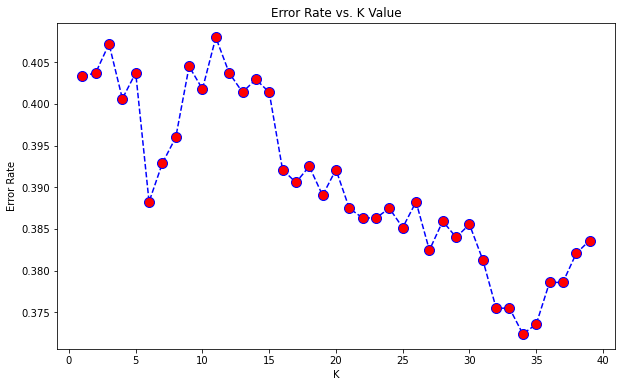

In [69]:
import matplotlib.pyplot as plt

# choose K, elbow method
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [70]:
# NOW WITH K = 34
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[805 526]
 [473 782]]


              precision    recall  f1-score   support

           0       0.63      0.60      0.62      1331
           1       0.60      0.62      0.61      1255

    accuracy                           0.61      2586
   macro avg       0.61      0.61      0.61      2586
weighted avg       0.61      0.61      0.61      2586



# KNN 2, pick significant value from LR

In [71]:
X = df[['prev_CW/SA_rate', 'type_d', 'segmentName_d', 'net_pay', 'prev_CW/SA_rate']]
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model instance with n_neighbors = 
knn = KNeighborsClassifier(n_neighbors = 5)

# Fit this KNN model to the training data.
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [73]:
# Use the predict method to predict values KNN model and X_test.
pred = knn.predict(X_test)

# Create a confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[763 509]
 [510 804]]


              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1272
           1       0.61      0.61      0.61      1314

    accuracy                           0.61      2586
   macro avg       0.61      0.61      0.61      2586
weighted avg       0.61      0.61      0.61      2586



Text(0, 0.5, 'Error Rate')

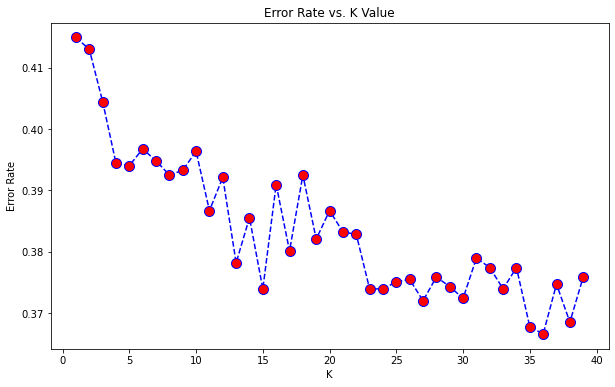

In [74]:
# choose K, elbow method
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [75]:
# NOW WITH K = 36
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[869 403]
 [545 769]]


              precision    recall  f1-score   support

           0       0.61      0.68      0.65      1272
           1       0.66      0.59      0.62      1314

    accuracy                           0.63      2586
   macro avg       0.64      0.63      0.63      2586
weighted avg       0.64      0.63      0.63      2586

